# SiLa Model

### Import Library

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Load data dari Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your folder in Google Drive
folder_path = '/content/drive/MyDrive/Dataset/Dataset SiLa/Dataset A-Z & Space'

# List all files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty dictionary to store dataframes
dataframes = {}

# Read each CSV file into a pandas DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df_name = os.path.splitext(file)[0] # Use the filename without extension as the dataframe name
    dataframes[df_name] = pd.read_csv(file_path)

Mounted at /content/drive


### Merge Data

In [3]:
def combine_all_csv(folder=folder_path):
    all_data = []
    for filename in os.listdir(folder):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder, filename))
            all_data.append(df)
    data = pd.concat(all_data, ignore_index=True)
    return data

if __name__ == "__main__":
    data = combine_all_csv()
    print(data.head())
    print(f"Jumlah data total: {len(data)}")
    data.to_csv("dataset_all.csv", index=False)
    print("[INFO] Dataset gabungan disimpan sebagai dataset_all.csv")

         x0        y0        x2        y1        x4        y2        x6  \
0  0.193785  0.854609  0.209607  0.835230  0.208476  0.814580  0.185263   
1  0.190345  0.859828  0.211483  0.840702  0.210446  0.815981  0.185013   
2  0.187291  0.852626  0.193649  0.835265  0.177160  0.812554  0.144572   
3  0.189714  0.854788  0.191900  0.832146  0.174217  0.810001  0.144564   
4  0.190718  0.857312  0.191667  0.835842  0.174061  0.812213  0.145291   

         y3        x8        y4  ...       y16       x34       y17       x36  \
0  0.805786  0.160135  0.793973  ...  0.852633  0.135652  0.797853  0.133375   
1  0.808080  0.158600  0.798283  ...  0.833917  0.139035  0.808164  0.134777   
2  0.809452  0.116525  0.806439  ...  0.809929  0.117854  0.788289  0.105620   
3  0.808175  0.116609  0.805681  ...  0.808220  0.120698  0.783264  0.107832   
4  0.807699  0.117791  0.806421  ...  0.811798  0.120693  0.783065  0.104793   

        y18       x38       y19       x40       y20  label  
0  0.82

### Data Understanding

In [4]:
df_all = pd.read_csv("dataset_all.csv")
df_all.head()

,x0,y0,x2,y1,x4,y2,x6,y3,x8,y4,...,y16,x34,y17,x36,y18,x38,y19,x40,y20,label
0,0.193785,0.854609,0.209607,0.835230,0.208476,0.814580,0.185263,0.805786,0.160135,0.793973,...,0.852633,0.135652,0.797853,0.133375,0.826402,0.149804,0.849351,0.164780,0.863481,Z
1,0.190345,0.859828,0.211483,0.840702,0.210446,0.815981,0.185013,0.808080,0.158600,0.798283,...,0.833917,0.139035,0.808164,0.134777,0.827631,0.151311,0.847184,0.167143,0.857351,Z
2,0.187291,0.852626,0.193649,0.835265,0.177160,0.812554,0.144572,0.809452,0.116525,0.806439,...,0.809929,0.117854,0.788289,0.105620,0.796752,0.117753,0.816349,0.130823,0.826116,Z
3,0.189714,0.854788,0.191900,0.832146,0.174217,0.810001,0.144564,0.808175,0.116609,0.805681,...,0.808220,0.120698,0.783264,0.107832,0.797767,0.122852,0.817458,0.138779,0.824431,Z
4,0.190718,0.857312,0.191667,0.835842,0.174061,0.812213,0.145291,0.807699,0.117791,0.806421,...,0.811798,0.120693,0.783065,0.104793,0.793577,0.118547,0.814917,0.135162,0.824276,Z


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      5400 non-null   float64
 1   y0      5400 non-null   float64
 2   x2      5400 non-null   float64
 3   y1      5400 non-null   float64
 4   x4      5400 non-null   float64
 5   y2      5400 non-null   float64
 6   x6      5400 non-null   float64
 7   y3      5400 non-null   float64
 8   x8      5400 non-null   float64
 9   y4      5400 non-null   float64
 10  x10     5400 non-null   float64
 11  y5      5400 non-null   float64
 12  x12     5400 non-null   float64
 13  y6      5400 non-null   float64
 14  x14     5400 non-null   float64
 15  y7      5400 non-null   float64
 16  x16     5400 non-null   float64
 17  y8      5400 non-null   float64
 18  x18     5400 non-null   float64
 19  y9      5400 non-null   float64
 20  x20     5400 non-null   float64
 21  y10     5400 non-null   float64
 22  

### Mengatasi Missing Values

In [6]:
df_all.isnull().sum()

,0
x0,0
y0,0
x2,0
y1,0
x4,0
y2,0
x6,0
y3,0
x8,0
y4,0


Tidak ada missing value

### Mengatasi data duplikat

In [7]:
print(f'Jumlah data duplikat:', df_all.duplicated().sum())

Jumlah data duplikat: 0


Tidak ada data duplikat

### Mengecek besaran data perlabel

<ipython-input-8-33ade8249f68>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


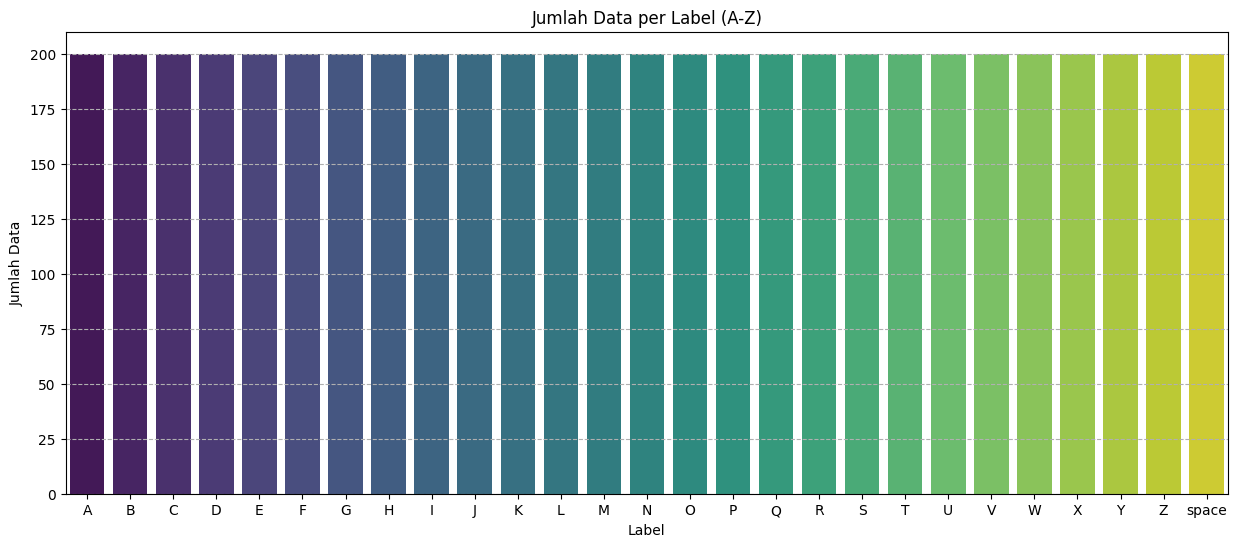

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' dataframe is already loaded and contains a 'label' column
if 'label' in data.columns:
    # Count the occurrences of each label
    label_counts = data['label'].value_counts().sort_index()

    # Create the visualization
    plt.figure(figsize=(15, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
    plt.title('Jumlah Data per Label (A-Z)')
    plt.xlabel('Label')
    plt.ylabel('Jumlah Data')
    plt.xticks(rotation=0) # Keep labels horizontal for clarity
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("Kolom 'label' tidak ditemukan dalam dataframe.")

Pada visualisasi terlihat bahwa besaran data setiap label seimbang sebesar 200 data perlabel

### Split data dan menyimpan label

In [9]:
# Load dataset
data = pd.read_csv("dataset_all.csv")
X = data.drop("label", axis=1).values
y = data["label"].values

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Simpan label encoder ke file JSON
label_mapping = {label: int(idx) for idx, label in enumerate(le.classes_)}
with open("label.json", "w") as f:
    json.dump(label_mapping, f)
print("[INFO] label.json disimpan.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

input_dim = X.shape[1]
num_classes = len(le.classes_)

[INFO] label.json disimpan.


### Modeling

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.1, verbose=1
)

loss, acc = model.evaluate(X_test, y_test)
print(f"[RESULT] Akurasi pada data uji: {acc * 100:.2f}%")

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0713 - loss: 3.2375 - val_accuracy: 0.2245 - val_loss: 2.7546
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2587 - loss: 2.5746 - val_accuracy: 0.4491 - val_loss: 1.9736
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3832 - loss: 1.9644 - val_accuracy: 0.6181 - val_loss: 1.4762
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5009 - loss: 1.5453 - val_accuracy: 0.6921 - val_loss: 1.2238
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5489 - loss: 1.3751 - val_accuracy: 0.6852 - val_loss: 1.0487
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5977 - loss: 1.2045 - val_accuracy: 0.7269 - val_loss: 0.9522
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6604 - loss: 1.0821 - val_accuracy: 0.7639 - val_loss: 0.8499
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7145 - loss: 0.9537 - val_accuracy: 0

### Evaluasi

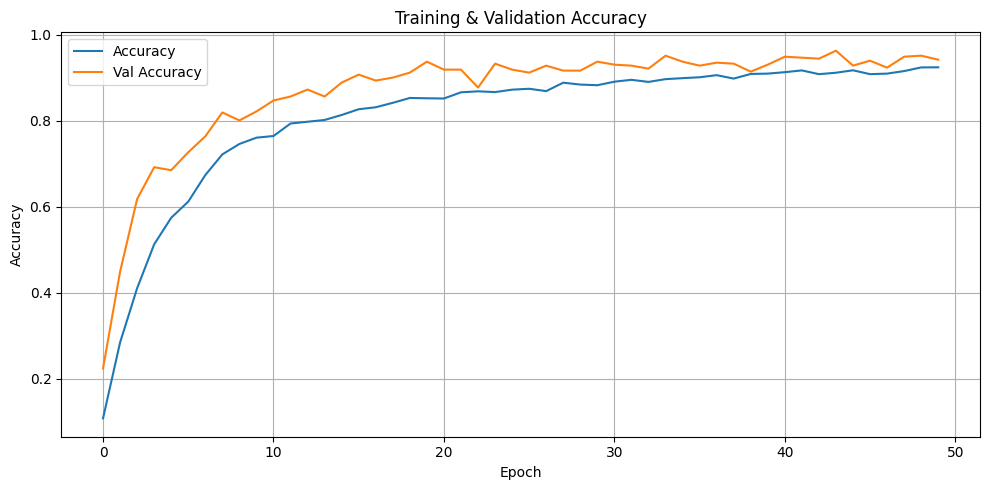

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

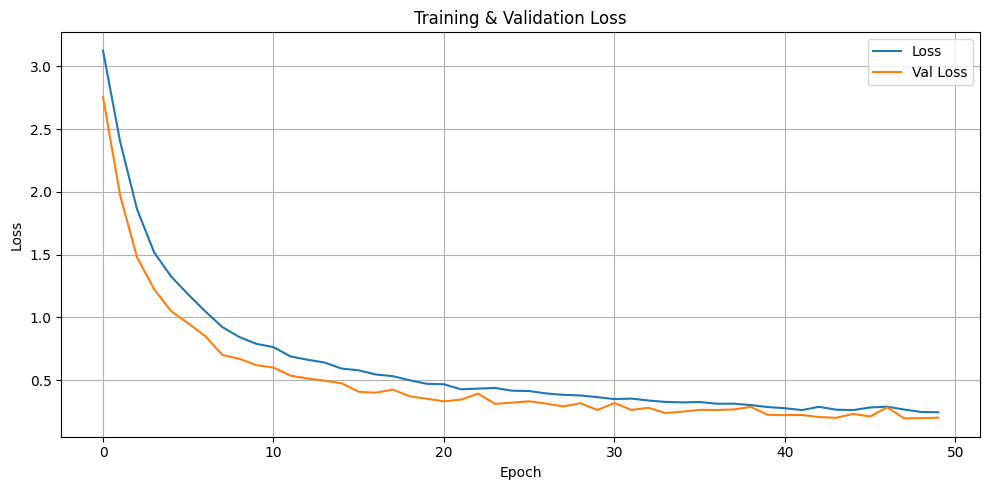

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


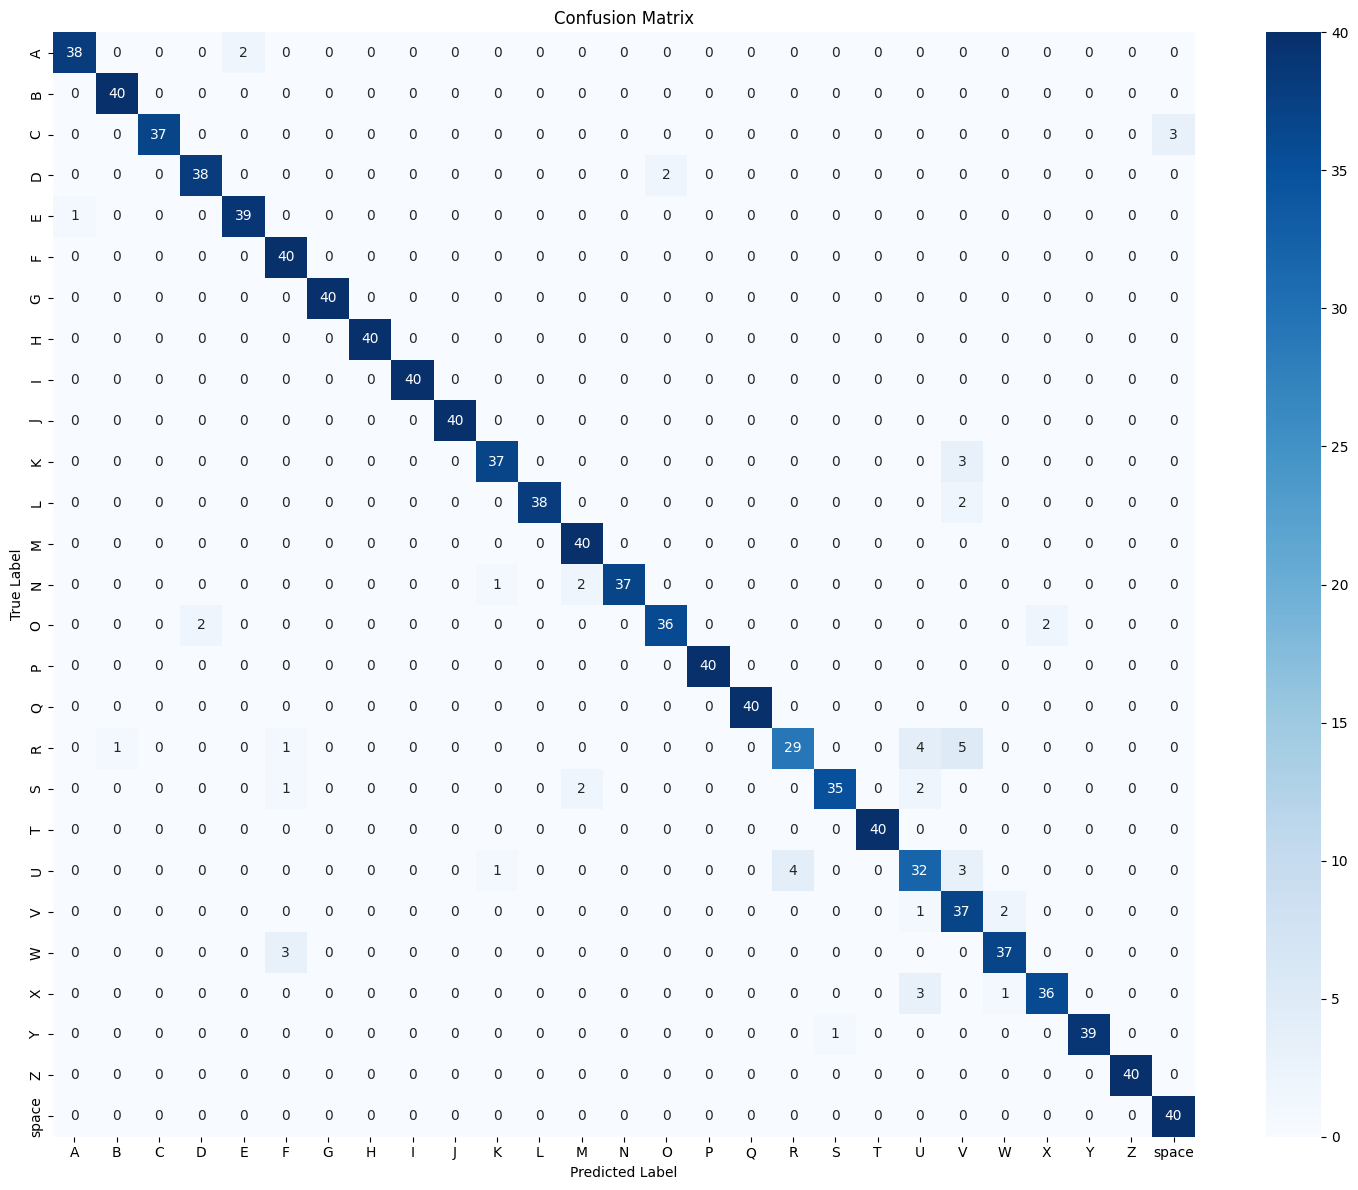

In [14]:
# Get predictions from the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels from the LabelEncoder
class_labels = le.classes_

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [20]:
# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame dan bulatkan ke 2 angka desimal
report_df = pd.DataFrame(report).transpose().round(2)

# Tampilkan hasil
print("Classification Report:")
print(report_df)


Classification Report:
              precision  recall  f1-score  support
A                  0.97    0.95      0.96    40.00
B                  0.98    1.00      0.99    40.00
C                  1.00    0.92      0.96    40.00
D                  0.95    0.95      0.95    40.00
E                  0.95    0.98      0.96    40.00
F                  0.89    1.00      0.94    40.00
G                  1.00    1.00      1.00    40.00
H                  1.00    1.00      1.00    40.00
I                  1.00    1.00      1.00    40.00
J                  1.00    1.00      1.00    40.00
K                  0.95    0.92      0.94    40.00
L                  1.00    0.95      0.97    40.00
M                  0.91    1.00      0.95    40.00
N                  1.00    0.92      0.96    40.00
O                  0.95    0.90      0.92    40.00
P                  1.00    1.00      1.00    40.00
Q                  1.00    1.00      1.00    40.00
R                  0.88    0.72      0.79    40.00
S       

### Save Model to H5

In [21]:
model.save("gesture_mlp_model.h5")
print("[INFO] Model disimpan sebagai gesture_mlp_model.h5")

[INFO] Model disimpan sebagai gesture_mlp_model.h5
